# 1. Contour Detection

<function matplotlib.pyplot.show(close=None, block=None)>

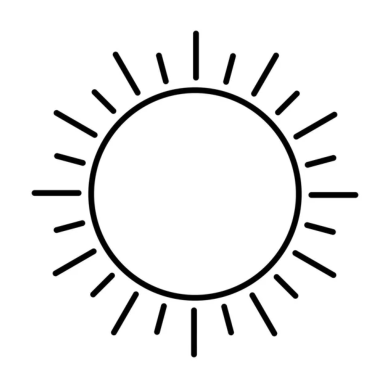

In [3]:
# 1. Read the Image and convert it to Grayscale Format
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sun.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

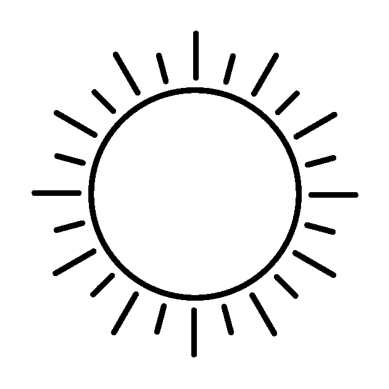

In [6]:
# 2. Apply Binary Thresholding or Canny edge detection
ret, thresh = cv2.threshold(img_gray, 145, 255, cv2.THRESH_BINARY)
# thresh = thresh[50:450, 50:1260]

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

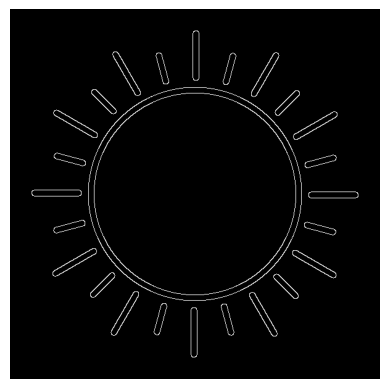

In [7]:
edges = cv2.Canny(img_gray, 100, 200)
plt.imshow(edges,cmap = 'gray')
plt.axis('off')

3. Find the Contours
hàm cv2.findContours()
--> contours, hierarchy = cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None)

1. image: Ảnh đầu vào ở dạng nhị phân (binary image). Thông thường, ảnh này được tạo ra bằng cách sử dụng các 
   phương pháp như ngưỡng (thresholding) hoặc phát hiện cạnh (edge detection).

2. mode: Chế độ tìm kiếm đường viền.

--> cv2.RETR_EXTERNAL: Chỉ tìm các đường viền ngoài cùng.

--> cv2.RETR_LIST: Tìm tất cả các đường viền và lưu trữ chúng mà không cần cấu trúc phân cấp.

--> cv2.RETR_CCOMP: Tìm tất cả các đường viền và tổ chức chúng thành hai cấp độ phân cấp.

--> cv2.RETR_TREE: Tìm tất cả các đường viền và tổ chức chúng thành một cây phân cấp đầy đủ.

3. method: Phương pháp xấp xỉ đường viền. 

--> cv2.CHAIN_APPROX_NONE: Lưu trữ tất cả các điểm trên đường viền.

--> cv2.CHAIN_APPROX_SIMPLE: Loại bỏ các điểm dư thừa và chỉ lưu trữ các điểm cuối cùng của mỗi đoạn thẳng.

--> cv2.CHAIN_APPROX_TC89_L1 và cv2.CHAIN_APPROX_TC89_KCOS: Các phương pháp xấp xỉ khác sử dụng thuật toán Teh-Chin.

4. contours: Đầu ra là một danh sách các đường viền được tìm thấy. Mỗi đường viền là một mảng các điểm (tọa độ x, y).

5. hierarchy: Đầu ra là một mảng chứa thông tin phân cấp của các đường viền.

6. offset: Tùy chọn, một điểm để bù đắp cho các điểm đường viền.



In [8]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
print(contours)

(array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32), array([[[295, 484]],

       [[296, 483]],

       [[297, 483]],

       [[298, 483]],

       [[299, 483]],

       [[300, 484]],

       [[301, 484]],

       [[302, 485]],

       [[303, 486]],

       [[303, 487]],

       [[303, 488]],

       [[303, 489]],

       [[303, 490]],

       [[303, 491]],

       [[303, 492]],

       [[303, 493]],

       [[303, 494]],

       [[303, 495]],

       [[303, 496]],

       [[303, 497]],

       [[303, 498]],

       [[303, 499]],

       [[303, 500]],

       [[303, 501]],

       [[303, 502]],

       [[303, 503]],

       [[303, 504]],

       [[303, 505]],

       [[303, 506]],

       [[303, 507]],

       [[303, 508]],

       [[303, 509]],

       [[303, 510]],

       [[303, 511]],

       [[303, 512]],

       [[303, 513]],

       [[303, 514]],

       [[303, 515]],

       [[303, 516]],

      

<function matplotlib.pyplot.show(close=None, block=None)>

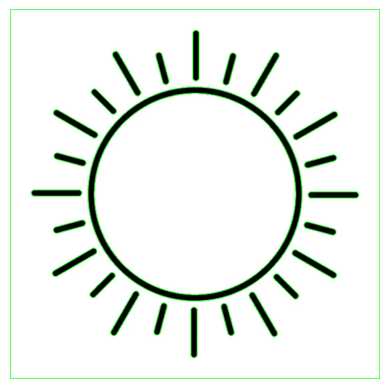

In [86]:
# 4. Draw the Contours
image_copy = image.copy()
# image_copy = image_copy[50:450, 50:1260]
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

# 2. Contour features

Moments

In [9]:
# Moments giúp tính toán một số đặc điểm như tâm khối của vật thể, diện tích của vật thể,... 
cnt = contours[0]
M = cv2.moments(cnt)
print(M)
print()
# Centroid được tính theo công thức cx = M10/M00, cy = M01/M00
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

{'m00': 358801.0, 'm10': 107460899.5, 'm01': 107460899.5, 'm20': 42912719200.33333, 'm11': 32184539400.25, 'm02': 42912719200.33333, 'm30': 19278539100749.75, 'm21': 12852359400499.834, 'm12': 12852359400499.834, 'm03': 19278539100749.75, 'mu20': 10728179800.083328, 'mu11': 0.0, 'mu02': 10728179800.083328, 'mu30': 0.00390625, 'mu21': 0.001953125, 'mu12': 0.001953125, 'mu03': 0.00390625, 'nu20': 0.0833333333333333, 'nu11': 0.0, 'nu02': 0.0833333333333333, 'nu30': 5.065542025235829e-17, 'nu21': 2.5327710126179146e-17, 'nu12': 2.5327710126179146e-17, 'nu03': 5.065542025235829e-17}

299 299


Contour Area


In [37]:
# Diện tích đường viền được tính bằng hàm cv2.contourArea() hoặc moments M['m00']
area = cv2.contourArea(cnt)

print(area)

358801.0


In [38]:
# Chu vi đường viền
perimeter = cv2.arcLength(cnt,True)
print( perimeter)

2396.0


Contour Perimeter

In [39]:
# Tham số thứ hai thể hiện là viền khép kín hay chỉ là đường cong
perimeter = cv2.arcLength(cnt,True)
print(perimeter)


2396.0


Contour Approximation

Nó xấp xỉ một hình dạng đường viền thành một hình dạng khác với số lượng đỉnh ít hơn tùy thuộc vào độ chính xác mà chúng ta chỉ định. Đây là một triển khai của thuật toán Douglas-Peucker . 

In [10]:
epsilon = 0.5*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

<function matplotlib.pyplot.show(close=None, block=None)>

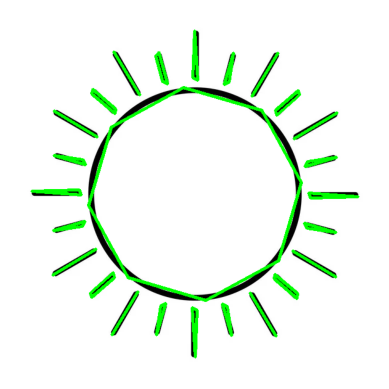

In [23]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    # Tính chu vi của đường viền
    epsilon = 0.044 * cv2.arcLength(cnt, True)
    
    # Xấp xỉ đường viền thành đa giác
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    # Vẽ đa giác xấp xỉ lên ảnh
    cv2.drawContours(image_copy, [approx], -1, (0, 255, 0), 3)

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

Bounding Rectangle

<function matplotlib.pyplot.show(close=None, block=None)>

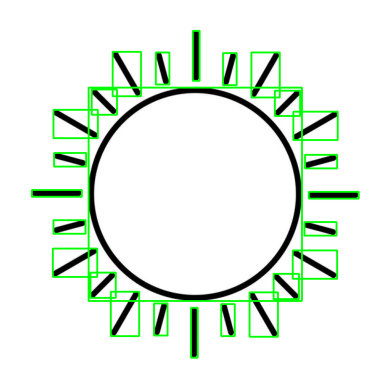

In [87]:


contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    # Tính chu vi của đường viền
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,255,0),2)
    

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

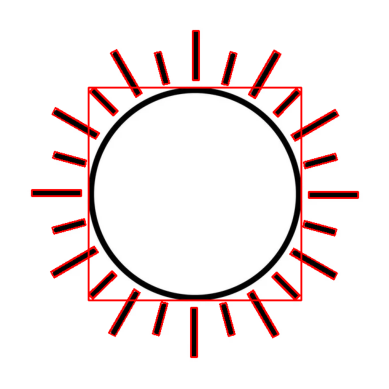

In [91]:
import numpy as np

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.drawContours(image_copy,[box],0,(0,0,255),2)
    

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

Minimum Enclosing Circle

<function matplotlib.pyplot.show(close=None, block=None)>

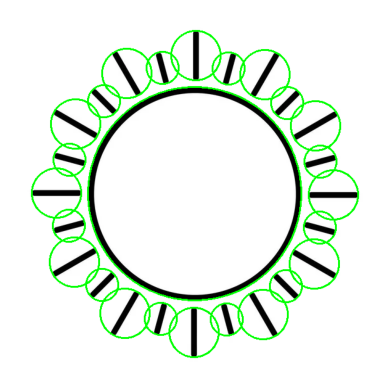

In [92]:
import numpy as np

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(image_copy,center,radius,(0,255,0),2)
    

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

Fitting an Ellipse

<function matplotlib.pyplot.show(close=None, block=None)>

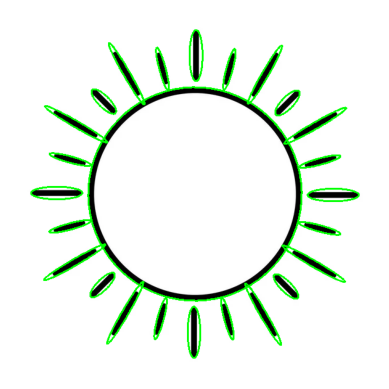

In [93]:
import numpy as np

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image_copy,ellipse,(0,255,0),2)

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

Fitting a Line

<function matplotlib.pyplot.show(close=None, block=None)>

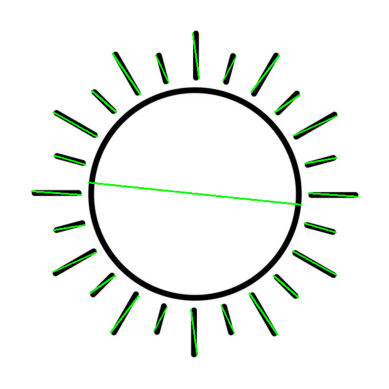

In [96]:
import numpy as np

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    rows,cols = image_copy.shape[:2]
    [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
    # lefty = int((-x*vy/vx) + y)
    # righty = int(((cols-x)*vy/vx)+y)
    # cv2.line(image_copy,(cols-1,righty),(0,lefty),(0,255,0),2)

    # Tính điểm đầu và cuối của đoạn thẳng gần biên của đường viền nhất
    leftmost_point = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost_point = tuple(cnt[cnt[:,:,0].argmax()][0])
     
    # Vẽ đoạn thẳng từ điểm trái nhất đến điểm phải nhất
    cv2.line(image_copy, leftmost_point, rightmost_point, (0, 255, 0), 2)

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

Convex Hull

<function matplotlib.pyplot.show(close=None, block=None)>

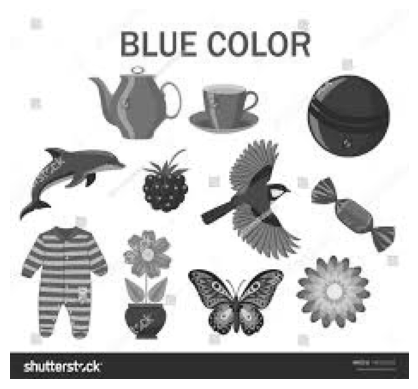

In [65]:
# 1. Read the Image and convert it to Grayscale Format
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('blue_image.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show

(np.float64(-0.5), np.float64(232.5), np.float64(215.5), np.float64(-0.5))

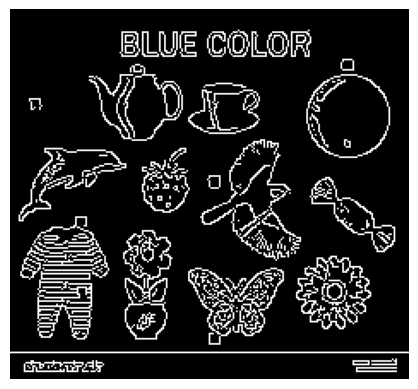

In [66]:
edges = cv2.Canny(img_gray, 100, 200)
plt.imshow(edges,cmap = 'gray')
plt.axis('off')

In [71]:
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
print(contours)

(array([[[202, 209]],

       [[202, 210]],

       [[202, 211]],

       [[203, 211]],

       [[204, 211]],

       [[205, 211]],

       [[206, 211]],

       [[207, 211]],

       [[208, 211]],

       [[209, 211]],

       [[210, 211]],

       [[211, 211]],

       [[212, 211]],

       [[213, 211]],

       [[214, 211]],

       [[215, 211]],

       [[216, 211]],

       [[217, 211]],

       [[218, 211]],

       [[219, 211]],

       [[220, 211]],

       [[221, 211]],

       [[222, 211]],

       [[223, 211]],

       [[224, 211]],

       [[225, 211]],

       [[224, 211]],

       [[223, 211]],

       [[222, 211]],

       [[221, 211]],

       [[220, 211]],

       [[219, 211]],

       [[218, 211]],

       [[217, 211]],

       [[216, 211]],

       [[215, 211]],

       [[214, 211]],

       [[213, 211]],

       [[212, 211]],

       [[211, 211]],

       [[210, 211]],

       [[209, 211]],

       [[208, 211]],

       [[207, 211]],

       [[206, 211]],

       [[

<function matplotlib.pyplot.show(close=None, block=None)>

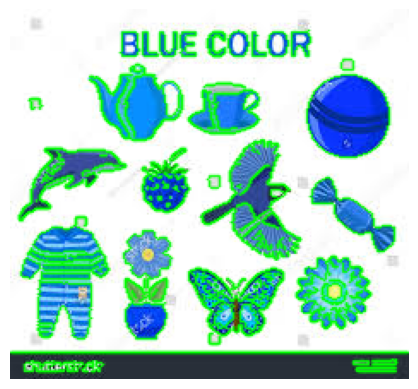

In [76]:
# 4. Draw the Contours
image_copy = image.copy()
# image_copy = image_copy[50:450, 50:1260]
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

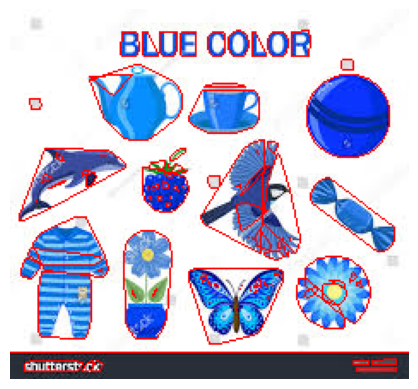

In [78]:

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()

# Duyệt qua từng đường viền tìm được
for cnt in contours:
    hull = cv2.convexHull(cnt)
    
    # Vẽ đa giác xấp xỉ lên ảnh
    # cv2.drawContours(image_copy, [cnt], -1, (0, 255, 0), 2)  # Đường viền gốc (màu xanh lá)
    cv2.drawContours(image_copy, [hull], -1, (0, 0, 255), 1)  # Vỏ lồi (màu xanh dương)

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

In [80]:
k = cv2.isContourConvex (cnt)
print(k)

False
